In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#Daten einlesen
data = pd.read_parquet('../src/data/interim/data_numeric.parquet')

data.head()

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,0,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,0,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0,0
3,4.0,55,14.0,2.0,50.8333,4.0,NaN,NaN,0.0,2.0,0.0000,1,1
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1,1


In [2]:
#check leere Zellen
data.isna().sum()

look_at_dates                    193
age                                0
age_stop_edu                    1920
household_size                   159
cntrylat                           0
cntrylon                           0
best_before_meaning_map         1122
validity_meaning_map            1126
work_scale                        85
population_density               199
salary                           111
no_date_spaghetti_throw_away       0
gender_Female                      0
dtype: int64

In [3]:
#Zeilen mit leeren Werten löschen
data = data.dropna()
data.isna().sum()

look_at_dates                   0
age                             0
age_stop_edu                    0
household_size                  0
cntrylat                        0
cntrylon                        0
best_before_meaning_map         0
validity_meaning_map            0
work_scale                      0
population_density              0
salary                          0
no_date_spaghetti_throw_away    0
gender_Female                   0
dtype: int64

In [4]:
#Duplikate entfernen
print('zeilen vor Duplikatentfernung: ', len(data))
data = data[data.duplicated()==False]
print('zeilen nach Duplikatentfernung: ', len(data))

zeilen vor Duplikatentfernung:  22636
zeilen nach Duplikatentfernung:  22602


In [5]:
data.head()

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,no_date_spaghetti_throw_away,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,0,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,0,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0,0
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1,1
5,4.0,21,18.0,2.0,50.8333,4.0,0.0,0.0,1.0,1.0,0.2850,0,1


In [6]:
data['no_date_spaghetti_throw_away'] = data['no_date_spaghetti_throw_away']==1
labels =data['no_date_spaghetti_throw_away']
data = data.drop(columns='no_date_spaghetti_throw_away')
data.head()

,look_at_dates,age,age_stop_edu,household_size,cntrylat,cntrylon,best_before_meaning_map,validity_meaning_map,work_scale,population_density,salary,gender_Female
0,2.0,64,13.0,2.0,50.8333,4.0,2.0,1.0,0.0,0.0,0.1139,1
1,4.0,87,15.0,1.0,50.8333,4.0,1.0,0.0,0.0,1.0,0.1139,1
2,4.0,73,30.0,1.0,50.8333,4.0,1.0,1.0,0.0,1.0,0.1139,0
4,4.0,74,24.0,1.0,50.8333,4.0,0.0,0.0,0.0,1.0,0.1139,1
5,4.0,21,18.0,2.0,50.8333,4.0,0.0,0.0,1.0,1.0,0.2850,1


In [7]:
labels

0        False
1        False
2        False
4         True
5        False
         ...  
26594    False
26596    False
26597     True
26599     True
26600     True
Name: no_date_spaghetti_throw_away, Length: 22602, dtype: bool

In [8]:
#Daten skalieren
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)
X

array([[-1.2930194 ,  0.5919809 , -1.32871239, ..., -1.24842899,
        -0.65456171,  0.77476118],
       [ 0.65355032,  2.01603218, -0.98267488, ...,  0.01475447,
        -0.65456171,  0.77476118],
       [ 0.65355032,  1.14921836,  1.61260645, ...,  0.01475447,
        -0.65456171, -1.29072032],
       ...,
       [ 0.65355032, -1.07973146, -0.29059986, ...,  0.01475447,
         0.18369862, -1.29072032],
       [ 0.65355032,  0.15857399,  0.40147516, ...,  0.01475447,
        -0.65456171,  0.77476118],
       [-2.26630425,  0.34431981,  0.74751267, ...,  1.27793792,
         0.36469127, -1.29072032]])

In [9]:
#Label als numpy array
y = labels.values
y

array([False, False, False, ...,  True,  True,  True])

In [20]:
from sklearn.model_selection import  StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv_splitter = StratifiedKFold(shuffle=True, random_state=42 ,n_splits=10)
splits = cv_splitter.split(X,y)

In [105]:
from sklearn.model_selection import  cross_validate
from yellowbrick.classifier import ConfusionMatrix
#Gute werte durch probieren
#max_depth =4
#n_estimators = 5

model = RandomForestClassifier(
    n_estimators = 2,
    max_depth=7,
    max_features=12,
    random_state=42
)
model.fit(X,y)
scores = cross_validate(model, X, y,
                        cv=cv_splitter,
                        scoring=['f1','precision','recall'],
                        return_train_score=True)
print('Test: ',scores['test_f1'].mean().round(3), 'Train: ',scores['train_f1'].mean().round(3))



Test:  0.311 Train:  0.362


In [106]:
import pickle
with open('lukas_model_no_date_spaghetti.pkl','wb')as file:
    pickle.dump(model,file)


<bound method Visualizer.show of ValidationCurve(ax=<AxesSubplot:>,
                cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                estimator=RandomForestClassifier(max_depth=7, max_features=12,
                                                 n_estimators=2,
                                                 random_state=42),
                n_jobs=-1, param_name='max_features',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                scoring='f1')>

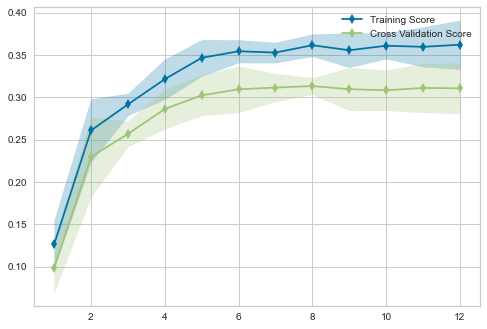

In [100]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
    model,
    param_name='max_features',
    param_range=range(1,13),
    cv=cv_splitter,
    scoring='f1',
    n_jobs=-1,
)
viz.fit(X,y)
viz.ax.legend().set_visible(True)
viz.show

In [102]:
all_predictions = model.predict(X)
prediction_comparison = (all_predictions==labels)
prediction_comparison.value_counts(normalize=True)

True     0.761879
False    0.238121
Name: no_date_spaghetti_throw_away, dtype: float64

In [81]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

model_dt = DecisionTreeClassifier(
    max_depth= 10,
    random_state=42,
    max_features=6
)
model_dt.fit(X_train,y_train)

from sklearn.tree import  plot_tree
from matplotlib import pyplot as plt

y_predicted_test_dt = model_dt.predict(X_test)
print(classification_report(y_test,y_predicted_test_dt))

              precision    recall  f1-score   support

       False       0.77      0.92      0.84      3341
        True       0.49      0.23      0.31      1180

    accuracy                           0.74      4521
   macro avg       0.63      0.57      0.57      4521
weighted avg       0.70      0.74      0.70      4521



In [82]:
scores = cross_validate(model_dt, X, y,
                        cv=cv_splitter,
                        scoring=['f1','precision','recall'],
                        return_train_score=True)
print('Test: ',scores['test_f1'].mean().round(3), 'Train: ',scores['train_f1'].mean().round(3))

Test:  0.324 Train:  0.454


<bound method Visualizer.show of ValidationCurve(ax=<AxesSubplot:>,
                cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                estimator=DecisionTreeClassifier(max_depth=30, max_features=6,
                                                 random_state=42),
                n_jobs=-1, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                scoring='f1')>

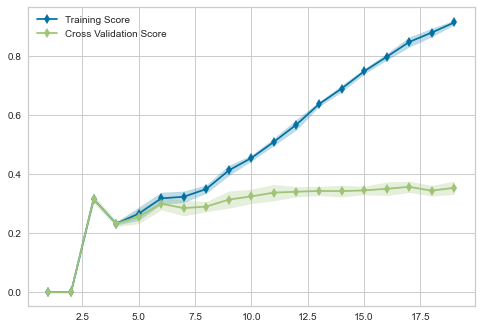

In [54]:
viz = ValidationCurve(
    model_dt,
    param_name='max_depth',
    param_range=range(1,20),
    cv=cv_splitter,
    scoring='f1',
    n_jobs=-1,
)
viz.fit(X,y)
viz.ax.legend().set_visible(True)
viz.show

In [101]:
model_rf = RandomForestClassifier(
    n_estimators = 2,
    max_depth=7,
    max_features=12,
    random_state=42
)
model_rf.fit(X_train,y_train)
y_predicted_test_rf = model_rf.predict(X_test)
print(classification_report(y_test,y_predicted_test_rf))

              precision    recall  f1-score   support

       False       0.77      0.92      0.84      3341
        True       0.53      0.24      0.33      1180

    accuracy                           0.74      4521
   macro avg       0.65      0.58      0.58      4521
weighted avg       0.71      0.74      0.71      4521



In [76]:
from sklearn.neighbors import  KNeighborsClassifier
#n 7,
model_kn =KNeighborsClassifier(n_neighbors = 11)
model_kn.fit(X_train,y_train)
y_predicted_test_kn = model_kn.predict(X_test)
print(classification_report(y_test,y_predicted_test_kn))

              precision    recall  f1-score   support

       False       0.77      0.92      0.84      3341
        True       0.49      0.22      0.30      1180

    accuracy                           0.74      4521
   macro avg       0.63      0.57      0.57      4521
weighted avg       0.70      0.74      0.70      4521



<bound method Visualizer.show of ValidationCurve(ax=<AxesSubplot:>,
                cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                estimator=KNeighborsClassifier(n_neighbors=11), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([10, 11, 12, 13, 14]), scoring='f1')>

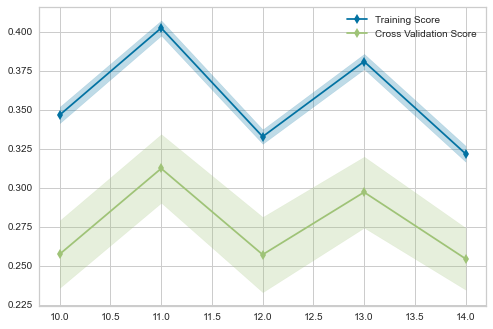

In [78]:
viz = ValidationCurve(
    model_kn,
    param_name='n_neighbors',
    param_range=range(10,15),
    cv=cv_splitter,
    scoring='f1',
    n_jobs=-1,
)
viz.fit(X,y)
viz.ax.legend().set_visible(True)
viz.show

In [77]:
scores = cross_validate(model_kn, X, y,
                        cv=cv_splitter,
                        scoring=['f1','precision','recall'],
                        return_train_score=True)
print('Test: ',scores['test_f1'].mean().round(3), 'Train: ',scores['train_f1'].mean().round(3))

Test:  0.312 Train:  0.402
